# Lab Assignment 3

### Name: MUHAMMAD IMAN ARIF BIN MAUZI
### Student ID: SW01083215

### Name: MUHAMMAD 'UMAR BIN ZOLKIFLE
### Student ID: SW01082397

In [4]:
pip install scipy==1.12

     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.4 kB 388.9 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 401.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/45.8 MB ? eta -:--:--
   ---------------------------------------- 0.2/45.8 MB 5.1 MB/s eta 0:00:09
    --------------------------------------- 0.7/45.8 MB 9.3 MB/s eta 0:00:05
   - -------------------------------------- 1.5/45.8 MB 10.5 MB/s eta 0:00:05
   - -------------------------------------- 1.5/45.8 MB 10.8 MB/s eta 0:00:05
   - -------------------------------------- 2.0/45.8 MB 9.1 MB/s eta 0:00:05
   -- ------------------------------------- 2.7/45.8 MB 10.0 MB/s eta 0:00:05
   -- ------------------------------------- 3.2/45.8 MB 10.3 MB/s eta 0:00:05
   --- ------------------------------------ 3.8/45.8 MB 10.5 MB/s eta 0:00:05
   -

  You can safely remove it manually.
  You can safely remove it manually.


In [10]:
pip install wordcloud

   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/301.2 kB 495.5 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/301.2 kB 825.8 kB/s eta 0:00:01
   --------------------------- ------------ 204.8/301.2 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 1.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Import required libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
# Read the dataset
df = pd.read_csv('news_dataset.csv')  # Adjust path if needed
df = df[['text']] # Use only the 'text' column

# Drop null values
df.dropna(subset=['text'], inplace=True)

# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text): 
    tokens = word_tokenize(text.lower())  # Tokenize the text into words and convert to lowercase 
    tokens = [token for token in tokens if token.isalnum()]  # Filter out non-alphanumeric tokens 
    tokens = [token for token in tokens if token not in stop_words]  # Remove stopwords from the tokens 
    tokens = [lemmatizer.lemmatize(token) for token in tokens]  # Lemmatize each token 
    return tokens  # Return the preprocessed tokens 
 
# Apply preprocessing
df['tokens'] = df['text'].apply(preprocess)

print(df['tokens']) 

# Join tokens back into cleaned text
df['cleaned_text'] = df['tokens'].apply(lambda x: ' '.join(x))

# Save preprocessed data to a new CSV
df[['text', 'cleaned_text']].to_csv('Preprocessed_News.csv', index=False)

print("\nPreprocessed data saved to 'Preprocessed_News.csv'")

0        [wondering, anyone, could, enlighten, car, saw...
1        [recently, posted, article, asking, kind, rate...
2        [depends, priority, lot, people, put, higher, ...
3        [excellent, automatic, found, subaru, legacy, ...
4        [ford, automobile, need, information, whether,...
                               ...                        
11309    [secrecy, clipper, chip, serial, number, clipp...
11310    [hi, interested, source, feal, encryption, alg...
11311    [actual, algorithm, classified, however, main,...
11312    [appears, generic, calling, upon, name, hell, ...
11313    [probably, keep, quiet, take, lest, get, kneec...
Name: tokens, Length: 11096, dtype: object

Preprocessed data saved to 'Preprocessed_News.csv'


In [3]:
# Create a Gensim Dictionary object from the preprocessed documents 
dictionary = corpora.Dictionary(df['tokens'])
 
# Filter out tokens that appear in less than 15 documents or more than 50% of the documents 
dictionary.filter_extremes(no_below=15, no_above=0.5) 
 
# Convert each preprocessed document into a bag-of-words representation using the dictionary 
corpus = [dictionary.doc2bow(text) for text in df['tokens']]

# Run LDA 
lda_model = LdaModel(corpus=corpus,
                     id2word=dictionary,
                     num_topics=4,
                     random_state=42,
                     update_every=1,
                     chunksize=100,
                     passes=10,
                     alpha='auto',
                     per_word_topics=True)

# Display topics
print("LDA Topics:")
print(lda_model.print_topics())
# Train an LDA model on the corpus with 4 topics using Gensim's LdaModel class 

LDA Topics:
[(0, '0.023*"government" + 0.012*"armenian" + 0.012*"president" + 0.009*"american" + 0.007*"new" + 0.007*"agency" + 0.007*"administration" + 0.007*"year" + 0.006*"israel" + 0.006*"state"'), (1, '0.013*"would" + 0.012*"people" + 0.011*"one" + 0.007*"know" + 0.007*"think" + 0.007*"right" + 0.006*"say" + 0.006*"could" + 0.006*"time" + 0.006*"like"'), (2, '0.028*"key" + 0.014*"encryption" + 0.014*"chip" + 0.013*"system" + 0.012*"db" + 0.012*"use" + 0.009*"information" + 0.009*"clipper" + 0.008*"privacy" + 0.007*"file"'), (3, '0.110*"q" + 0.066*"1" + 0.051*"x" + 0.050*"0" + 0.045*"n" + 0.039*"2" + 0.038*"e" + 0.027*"k" + 0.026*"3" + 0.025*"4"')]


In [4]:
# Generate BoW corpus for all documents
corpus = [dictionary.doc2bow(text) for text in df['tokens']]

# Empty list to store dominant topic labels for each document
article_labels = []

# Iterate over each document in the corpus
for i, bow in enumerate(corpus):
    # Get list of topic probabilities
    topic_probs = lda_model.get_document_topics(bow)
    
    # Determine topic with highest probability
    if topic_probs:
        dominant_topic = max(topic_probs, key=lambda x: x[1])[0]
    else:
        dominant_topic = None  # Handle empty documents safely

    article_labels.append(dominant_topic)

# Add topic labels to DataFrame
df['Topic'] = article_labels

# Print final DataFrame with original text and dominant topic
df_result = df[['text', 'Topic']]
print("Table with Articles and Assigned Topics:\n")
print(df_result.head(10))  # Show first 10 rows

Table with Articles and Assigned Topics:

                                                text  Topic
0  I was wondering if anyone out there could enli...      1
1  I recently posted an article asking what kind ...      1
2  \nIt depends on your priorities.  A lot of peo...      1
3  an excellent automatic can be found in the sub...      1
4  : Ford and his automobile.  I need information...      1
5  \nYo! Watch the attributions--I didn't say tha...      1
6  \nYou can avoid these problems entirely by ins...      1
7  I have a 1986 Acura Integra 5 speed with 95,00...      1
8  \nassuming yours is a non turbo MR2, the gruff...      1
9  \n\nIn addition to restricted mileage, many cl...      1


In [5]:
# Print top terms for each topic 
for topic_id in range(lda_model.num_topics): 
    print(f"Top terms for Topic #{topic_id}:") 
    top_terms = lda_model.show_topic(topic_id, topn=10) 
    print([term[0] for term in top_terms]) 
    print() 

Top terms for Topic #0:
['government', 'armenian', 'president', 'american', 'new', 'agency', 'administration', 'year', 'israel', 'state']

Top terms for Topic #1:
['would', 'people', 'one', 'know', 'think', 'right', 'say', 'could', 'time', 'like']

Top terms for Topic #2:
['key', 'encryption', 'chip', 'system', 'db', 'use', 'information', 'clipper', 'privacy', 'file']

Top terms for Topic #3:
['q', '1', 'x', '0', 'n', '2', 'e', 'k', '3', '4']



In [6]:
# Print the top terms for each topic with weight 
print("Top Terms for Each Topic:") 
for idx, topic in lda_model.print_topics(): 
    print(f"Topic {idx}:") 
    terms = [term.strip() for term in topic.split("+")] 
    for term in terms: 
        weight, word = term.split("*") 
        print(f"- {word.strip()} (weight: {weight.strip()})") 
    print() 

Top Terms for Each Topic:
Topic 0:
- "government" (weight: 0.023)
- "armenian" (weight: 0.012)
- "president" (weight: 0.012)
- "american" (weight: 0.009)
- "new" (weight: 0.007)
- "agency" (weight: 0.007)
- "administration" (weight: 0.007)
- "year" (weight: 0.007)
- "israel" (weight: 0.006)
- "state" (weight: 0.006)

Topic 1:
- "would" (weight: 0.013)
- "people" (weight: 0.012)
- "one" (weight: 0.011)
- "know" (weight: 0.007)
- "think" (weight: 0.007)
- "right" (weight: 0.007)
- "say" (weight: 0.006)
- "could" (weight: 0.006)
- "time" (weight: 0.006)
- "like" (weight: 0.006)

Topic 2:
- "key" (weight: 0.028)
- "encryption" (weight: 0.014)
- "chip" (weight: 0.014)
- "system" (weight: 0.013)
- "db" (weight: 0.012)
- "use" (weight: 0.012)
- "information" (weight: 0.009)
- "clipper" (weight: 0.009)
- "privacy" (weight: 0.008)
- "file" (weight: 0.007)

Topic 3:
- "q" (weight: 0.110)
- "1" (weight: 0.066)
- "x" (weight: 0.051)
- "0" (weight: 0.050)
- "n" (weight: 0.045)
- "2" (weight: 0.039)

In [8]:
# Print top words in each topic
topics = lda_model.print_topics(num_words=10)
print("\nTop keywords per topic:")
for topic_id, topic_words in topics:
    print(f"Topic {topic_id}: {topic_words}")



Top keywords per topic:
Topic 0: 0.023*"government" + 0.012*"armenian" + 0.012*"president" + 0.009*"american" + 0.007*"new" + 0.007*"agency" + 0.007*"administration" + 0.007*"year" + 0.006*"israel" + 0.006*"state"
Topic 1: 0.013*"would" + 0.012*"people" + 0.011*"one" + 0.007*"know" + 0.007*"think" + 0.007*"right" + 0.006*"say" + 0.006*"could" + 0.006*"time" + 0.006*"like"
Topic 2: 0.028*"key" + 0.014*"encryption" + 0.014*"chip" + 0.013*"system" + 0.012*"db" + 0.012*"use" + 0.009*"information" + 0.009*"clipper" + 0.008*"privacy" + 0.007*"file"
Topic 3: 0.110*"q" + 0.066*"1" + 0.051*"x" + 0.050*"0" + 0.045*"n" + 0.039*"2" + 0.038*"e" + 0.027*"k" + 0.026*"3" + 0.025*"4"


In [7]:
from gensim.models import CoherenceModel

# Evaluate model using coherence score
coherence_model_lda = CoherenceModel(model=lda_model, texts=df['tokens'], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()

print(f"\nCoherence Score of the LDA model: {coherence_score:.4f}")



Coherence Score of the LDA model: 0.6918


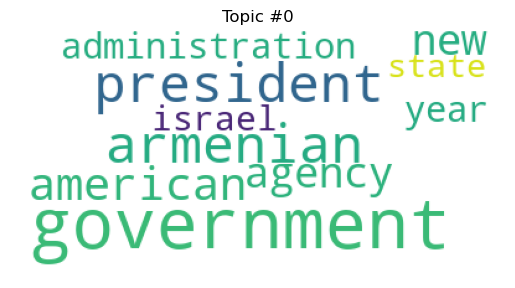

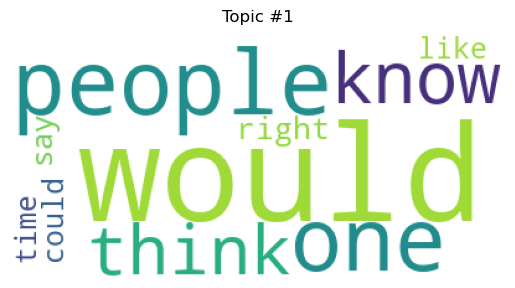

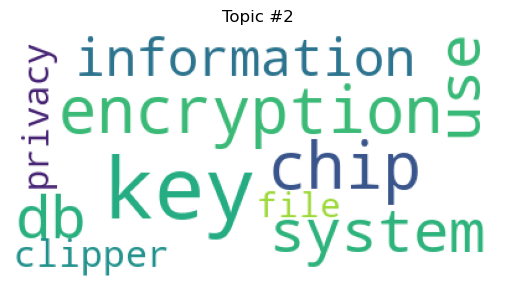

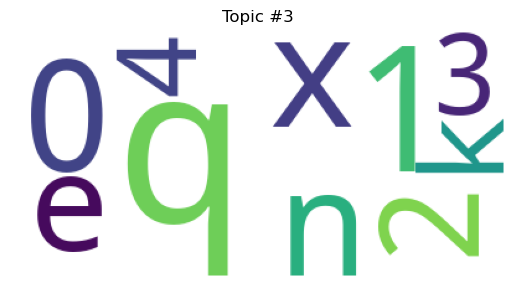

In [10]:
# Visualize topics using WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for i, topic in lda_model.show_topics(formatted=False, num_topics=4):
    plt.figure()
    plt.imshow(WordCloud(background_color='white').fit_words(dict(topic)))
    plt.axis("off")
    plt.title(f"Topic #{i}")
    plt.show()

# Interpretation of Coherence Score 

Interpretation of the Coherence Score: The coherence score is a measure of how meaningful or semantically consistent the topics generated by the LDA model are. A higher coherence score (closer to 1) indicates that the words within each topic are more related, making the topics easier for humans to interpret. In this assignment, the coherence score helps evaluate how well the LDA model has grouped the unlabelled news articles into meaningful topics. If the score is low, adjustments to preprocessing, number of topics, or model parameters may be needed.



In [11]:
# Save topics to a text file
with open("lda_topics_output.txt", "w") as f:
    for idx, topic in lda_model.print_topics(-1):
        f.write(f"Topic {idx}: {topic}\n")